In [37]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt

<!-- ![iris.png](attachment:Iris-Recognition.github.io\iris.png) -->
![SNOWFALL](iris.png)

In [38]:
# Importing data set
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [0, 2]] 
y = iris.target

In [39]:
import pandas as pd 
dataset = pd.read_csv("iris.csv")
print("Example for Setosa(0)")
print("Sepal length: " + str(dataset.iloc[2][0]), ", Petal Length: " + str(dataset.iloc[2][2]))
print("Example for Versicolour(1)")
print("Sepal length: " + str(dataset.iloc[70][0]), ", Petal Length: " + str(dataset.iloc[70][2]))
print("Example for Virginica(2)")
print("Sepal length: " + str(dataset.iloc[130][0]), ", Petal Length: " + str(dataset.iloc[130][2]))

Example for Setosa(0)
Sepal length: 4.7 , Petal Length: 1.3
Example for Versicolour(1)
Sepal length: 5.9 , Petal Length: 4.8
Example for Virginica(2)
Sepal length: 7.4 , Petal Length: 6.1


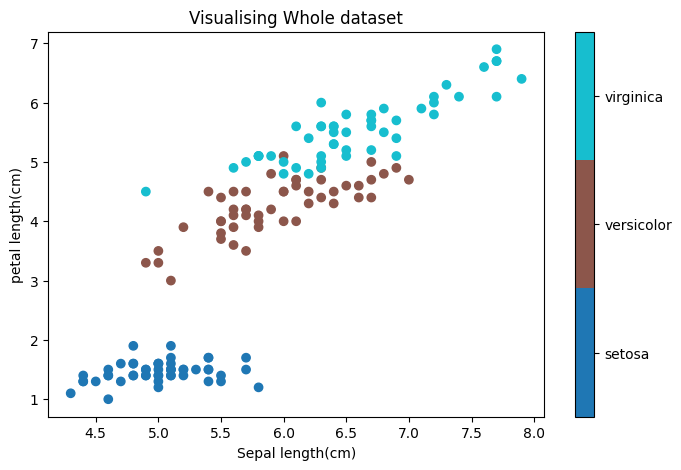

In [40]:
x_index = 0
y_index = 2

# this formatter will label the colorbar with the correct target names
plt.figure(figsize=(8, 5))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, 0], iris.data[:, 2],
            c=iris.target, cmap=plt.cm.get_cmap('tab10', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.title("Visualising Whole dataset")
plt.xlabel("Sepal length(cm)")
plt.ylabel("petal length(cm)");

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [42]:
# K-Near Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric="minkowski")
knn.fit(X_train, y_train);

In [43]:
y_pred_knn = knn.predict(X_test)
# np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.reshape(len(y_test), 1)), axis =1)

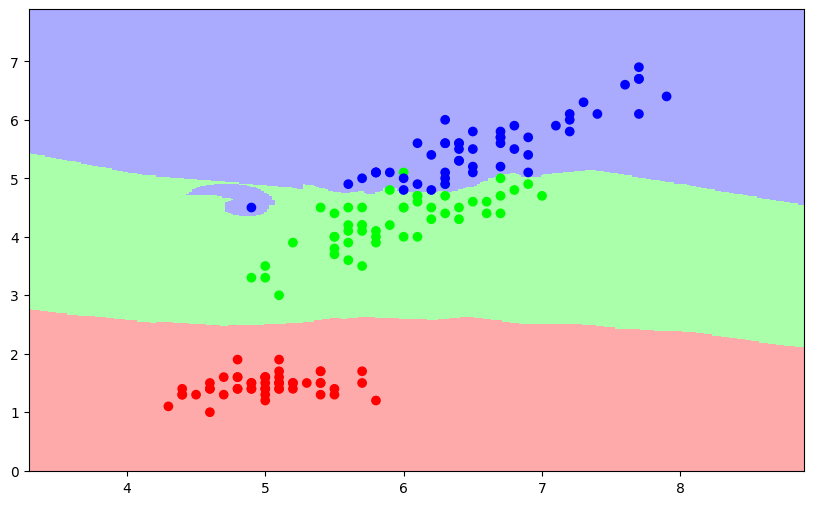

In [44]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 5

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_knn, y_test)

1.0

In [46]:
# Decision Tree Classification
from sklearn.tree import  DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=0, criterion='entropy')
decisionTree.fit(X_train, y_train);

In [47]:
y_pred_tree = decisionTree.predict(X_test)
# np.concatenate((y_pred_tree.reshape(len(y_pred_tree), 1), y_test.reshape(len(y_test), 1)), axis =1)

C:\Users\Layah\AppData\Local\Temp\ipykernel_15484\3594355318.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


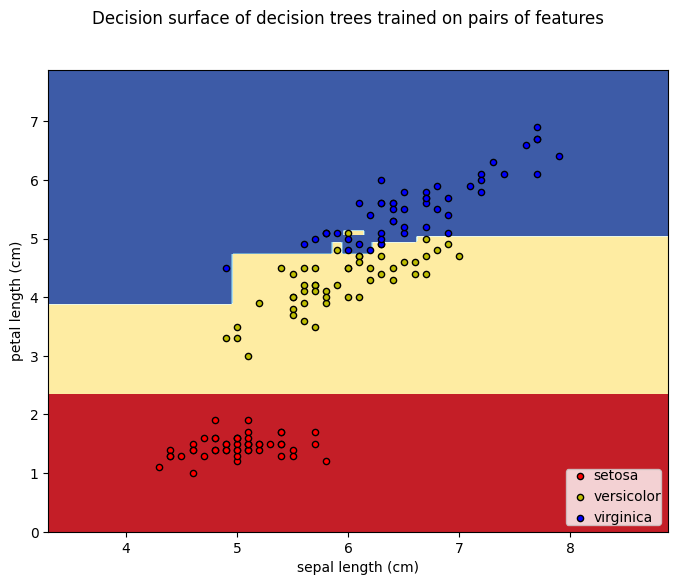

In [48]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 2]]):
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = decisionTree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=20,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

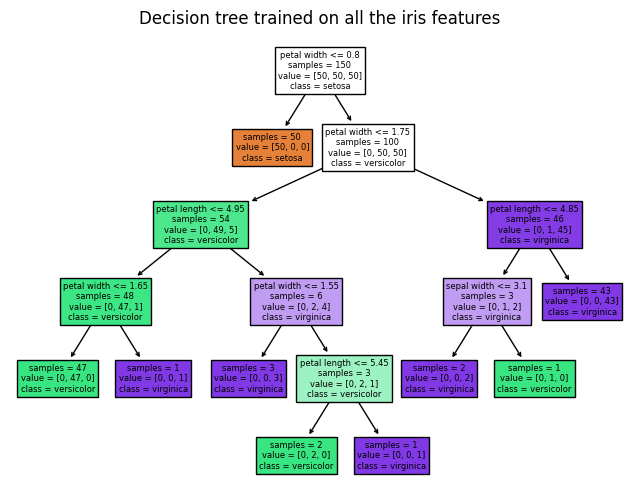

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
class_names = ['setosa', 'versicolor', 'virginica']
clf = decisionTree.fit(iris.data, iris.target)
plot_tree(clf,feature_names=['sepal length','sepal width','petal length','petal width'], class_names= class_names, filled = True, impurity= False)
plt.title("Decision tree trained on all the iris features")
plt.show()


In [50]:
accuracy_score(y_pred_tree, y_test)

1.0

In [51]:
# Logictic Regression
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state=0)
regressor.fit(X_train, y_train);

In [52]:
y_pred_regressor = regressor.predict(X_test)
# np.concatenate((y_pred_regressor.reshape(len(y_regressor_tree), 1), y_test.reshape(len(y_test), 1)), axis =1)

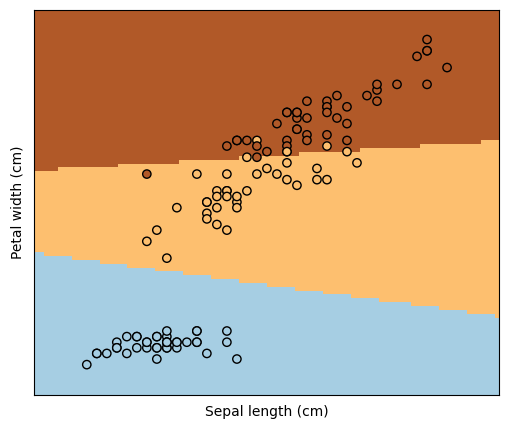

In [53]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    regressor,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length (cm)",
    ylabel="Petal width (cm)",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())

plt.show()

In [54]:
accuracy_score(y_pred_regressor, y_test)

0.9666666666666667